In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import scipy.stats as stats

In [2]:
df=pd.read_csv("Resources/VITA-MINE.csv")
df.tail(3)

,RA_Report #,Year/Month,Year,PRI_Reported Brand/Product Name,Type,Brand/Product,CI_Gender,CI_Age at Adverse Event,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Outcome,Severity
35237,214407,2017-06,2017,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,NaN,Female,92.0,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",HOSPITALIZATION,3
35238,214516,2017-06,2017,CALTRATE CALCIUM,CALCIUM,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3
35239,214516,2017-06,2017,VITAMIN D3,VITAMIN D,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3


In [3]:
#### neal py code

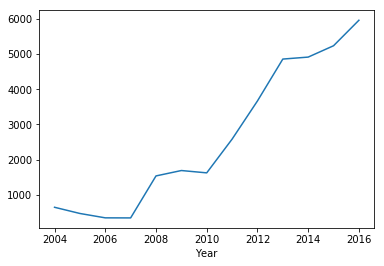

In [4]:
b=df.groupby("Year")["Outcome"].count()
b[:-1].plot()


In [5]:
c=df.groupby("Year/Month")["Outcome"].count()
c2016=c[:-5]
c20161=c[:-7]
df1=pd.DataFrame(c2016)
df1.reset_index(inplace=True)



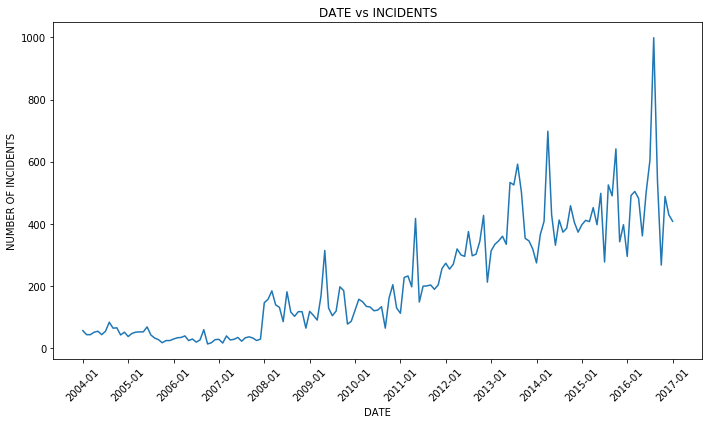

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot_date(df1["Year/Month"], c2016, '-')
plt.xticks(rotation=45)
loc = ticker.MultipleLocator(base=12) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.title("DATE vs INCIDENTS")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("DATE")
plt.tight_layout()
plt.savefig('Image/DATEvsINCIDENTS.png')
plt.show()

In [7]:
#from graph above, we see that the # of incident vs time follows geometric brownian motion
#so we will use monte carlo method to simulate the # of incident each month for next 10 years
creturn=np.log(1+c2016.pct_change())
u=np.array([creturn.mean()])
stdev=np.array([creturn.std()])
t_interval=120
iteration=100000
drift=u-.5*stdev**2
monthlychange=np.exp(drift+stdev*norm.ppf(np.random.rand(t_interval,iteration)))

In [8]:
Simulation=np.zeros_like(monthlychange)
Simulation[0]=c20161[-1]
for x in range(1,t_interval):
    Simulation[x]=Simulation[x-1]*monthlychange[x]

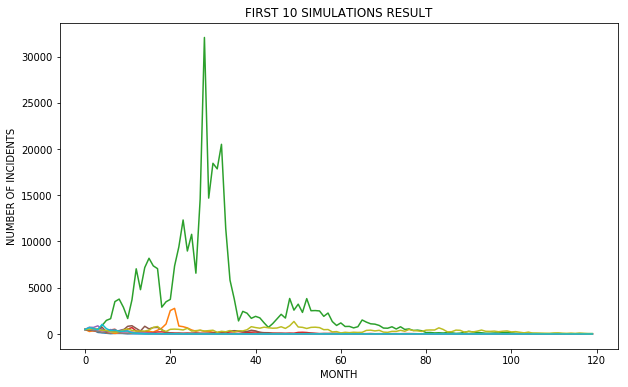

In [9]:
plt.figure(figsize=(10,6))
plt.plot(Simulation[:,:10])
plt.title("FIRST 10 SIMULATIONS RESULT")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.savefig('Image/FIRST10_SIMULATIONS.png')
plt.show()

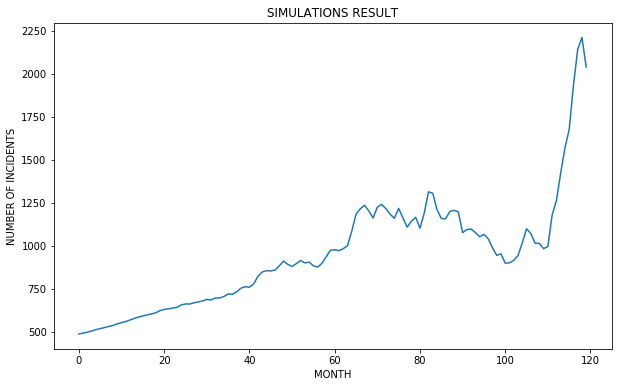

In [10]:
a=[]
for x in range(t_interval):
    a.append(Simulation[x].mean())
plt.figure(figsize=(10,6))
plt.plot(a)
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.title("SIMULATIONS RESULT")
plt.savefig('Image/SIMULATION_RESULT.png')
plt.show()


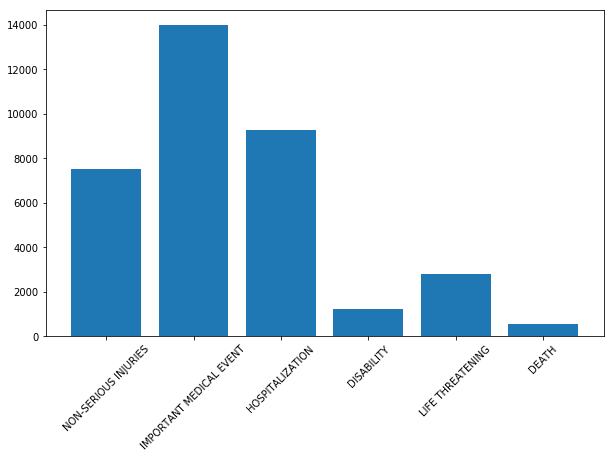

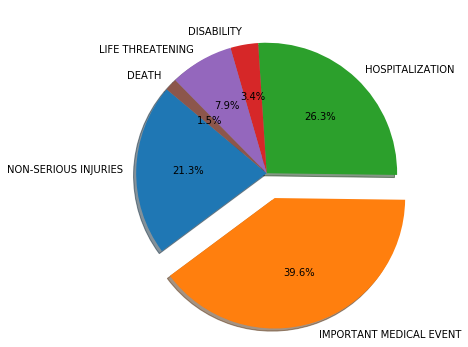

In [11]:
zz=df.groupby("Outcome")["Year"].count()
zz=pd.DataFrame(zz)
zz.reset_index(inplace=True)
zz=zz.reindex([5,3,2,1,4,0])
plt.figure(figsize=(10,6))
plt.bar(zz.Outcome,zz.Year)
exp1=np.zeros(len(zz))
exp1[1]=0.2
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
plt.pie(zz.Year, explode=exp1, labels=zz.Outcome,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

<BarContainer object of 2 artists>

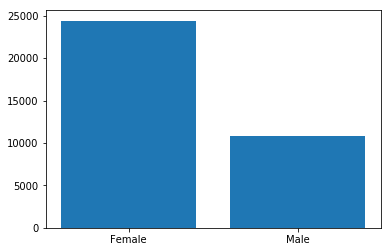

In [12]:
zz1=df.groupby("CI_Gender")["Outcome"].count()
zz1=zz1[:2]
plt.bar(["Female","Male"],zz1)

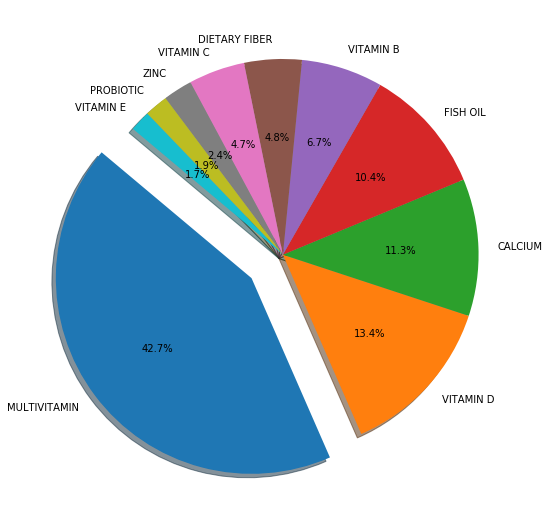

In [13]:
zz2=df.groupby("Type")["Outcome"].count()
zz2=zz2.sort_values(ascending=False)
zz2=zz2[:10]
#top 10 supplement incident
explode=np.zeros(len(zz2))
explode[0]=0.2
plt.figure(figsize=(10,9))
plt.pie(zz2.values, explode=explode, labels=zz2.index,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [14]:
dfmalesev=df[df["CI_Gender"]=="Male"]
dfmalesevsamp=dfmalesev["Severity"]
dffemalesev=df[df["CI_Gender"]=="Female"]
dffemalesevsamp=dffemalesev["Severity"]
t_stat, p_val = stats.ttest_ind(dfmalesevsamp.values, dffemalesevsamp.values, equal_var=False)
print(f"p-value is: {p_val}")
print(f"t-test value is: {t_stat}")
print("\nHo:μ(Men Severity)-μ(Women Severity)=0\nHa:μ(Men Severity)-μ(Women Severity)≠0\n")
print(f"P_val = {round(p_val,5)}, thus p < 0.05")
print("Reject Null Hypothese, We conclude that there is significant difference between the mean Severity of men and women")

p-value is: 1.041058484452447e-61
t-test value is: 16.63702383396303

Ho:μ(Men Severity)-μ(Women Severity)=0
Ha:μ(Men Severity)-μ(Women Severity)≠0

P_val = 0.0, thus p < 0.05
Reject Null Hypothese, We conclude that there is significant difference between the mean Severity of men and women
